In [1]:
import pandas as pd

In [251]:
# Load CSV file
from sklearn.model_selection import train_test_split

# Load the dataset from CSV
data = pd.read_csv("/content/forest_type_mapping.csv")

# Split the dataset into features (X) and labels (y)
X = data.drop('class', axis=1)  # Adjust 'target_column' accordingly
y = data['class']  # Adjust 'target_column' accordingly

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)



In [252]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

In [253]:
import graphviz


In [254]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [255]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

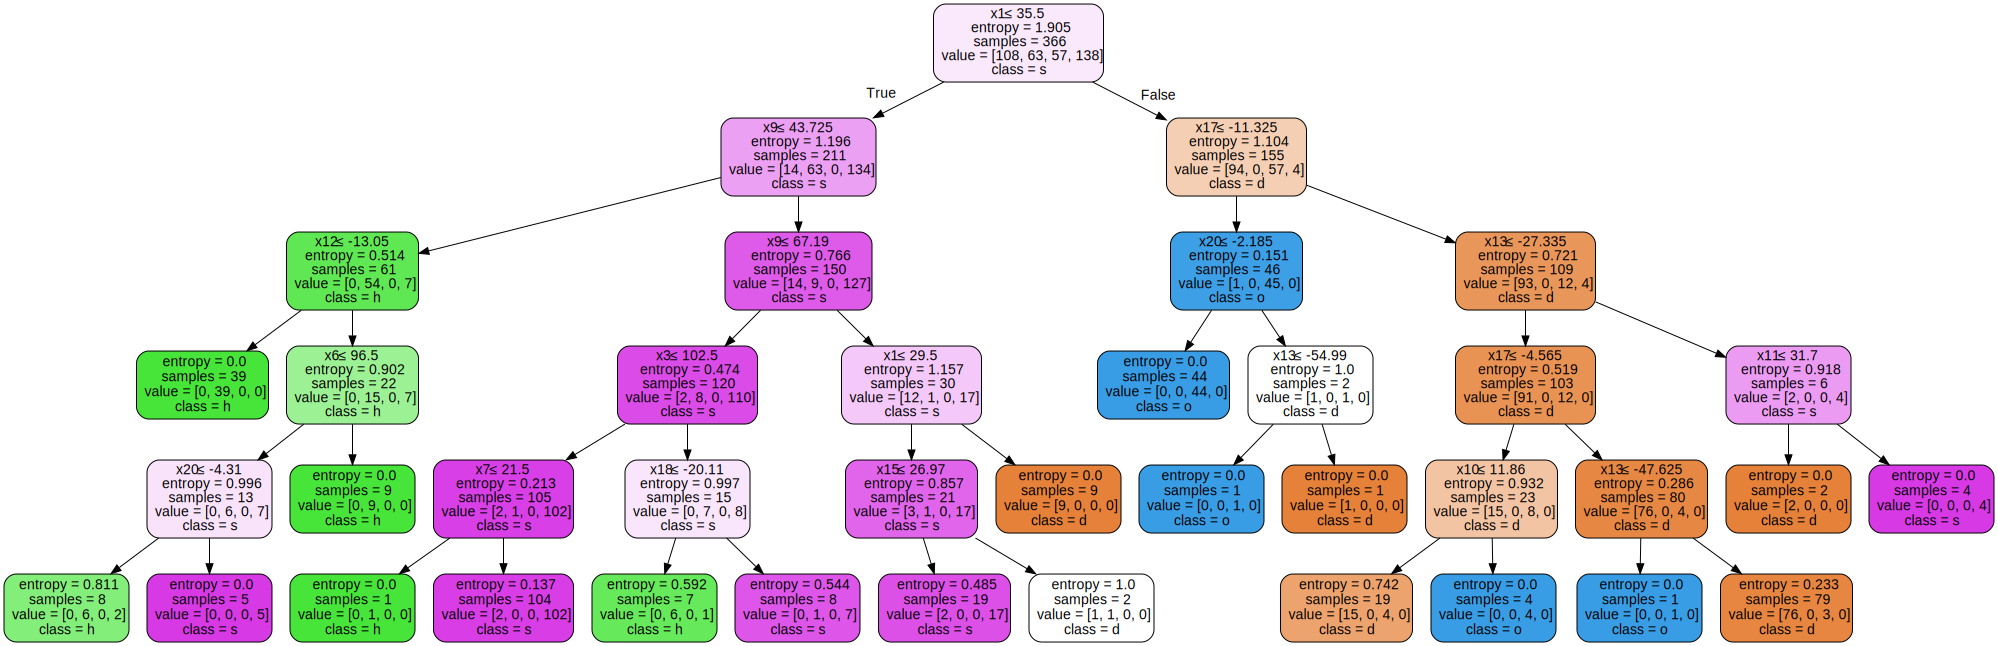

In [271]:
clf = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy')
clf = clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True, class_names=['d', 'h', 'o', 's'])
graph = graphviz.Source(dot_data)
graph.render('Forest Type Mapping', view=True)
graph

In [270]:
# Get the predicted labels
y_pred = clf.predict(X_test)

In [262]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='micro')

# Calculate recall
recall = recall_score(y_test, y_pred, average='micro')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='micro')

0.910828025477707


In [263]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          d        0.90      0.92      0.91        51
          h        0.91      0.87      0.89        23
          o        0.96      0.85      0.90        26
          s        0.90      0.95      0.92        57

    accuracy                           0.91       157
   macro avg       0.92      0.90      0.91       157
weighted avg       0.91      0.91      0.91       157



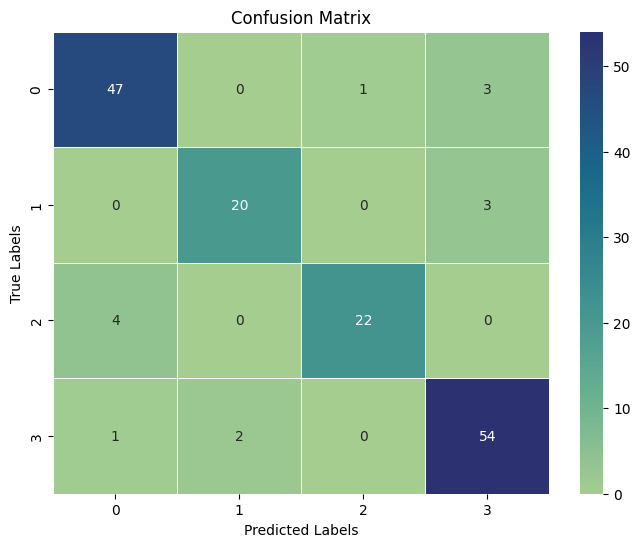

In [264]:

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="crest", linewidth='0.5')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

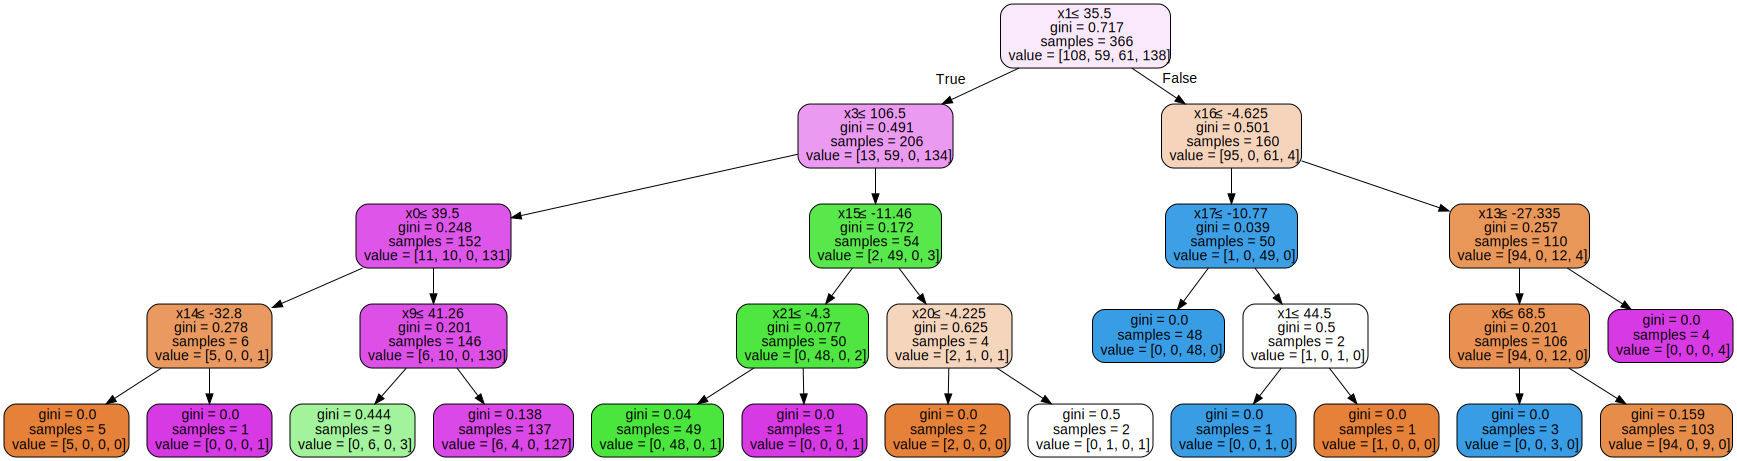

In [237]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('Forest Type Mapping 4', view=True)
graph

In [238]:
# Get the predicted labels
y_pred = clf.predict(X_test)

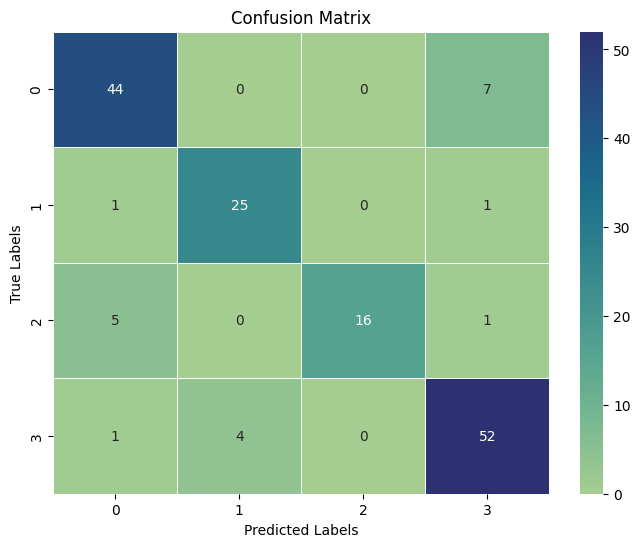

In [239]:

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="crest", linewidth='0.5')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

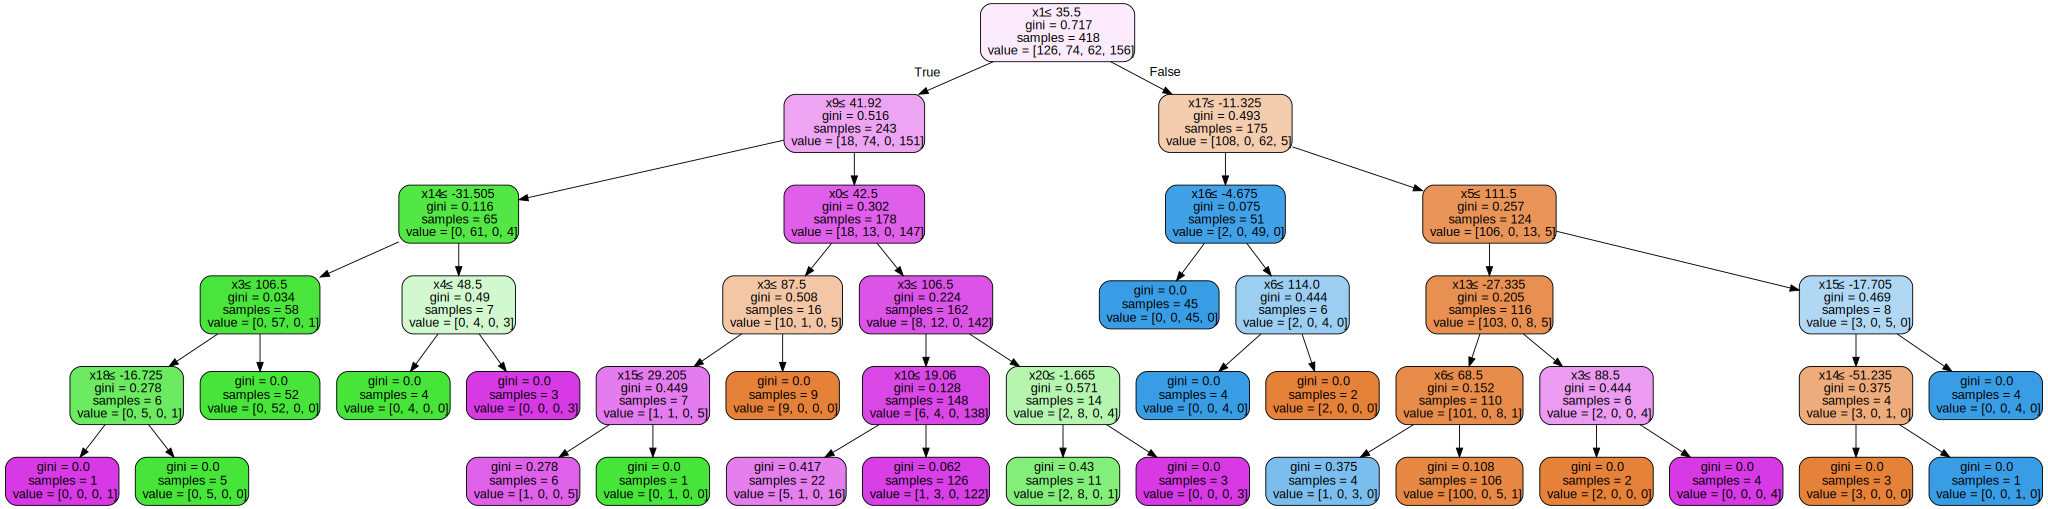

In [126]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('Forest Type Mapping 5', view=True)
graph

In [128]:
# Get the predicted labels
y_pred = clf.predict(X_test)

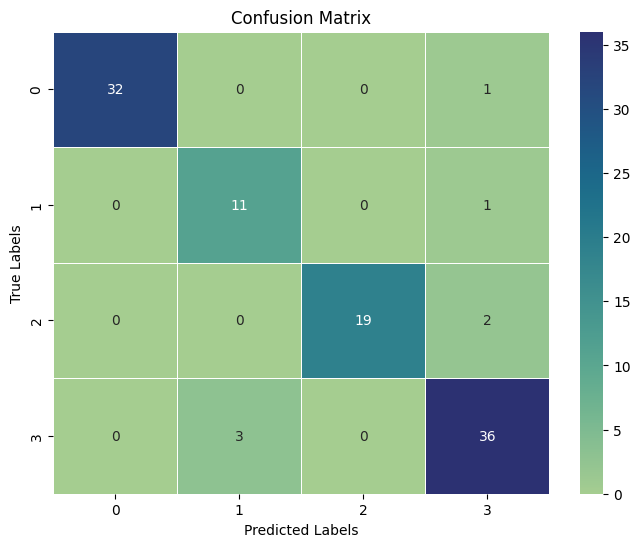

In [129]:

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="crest", linewidth='0.5')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

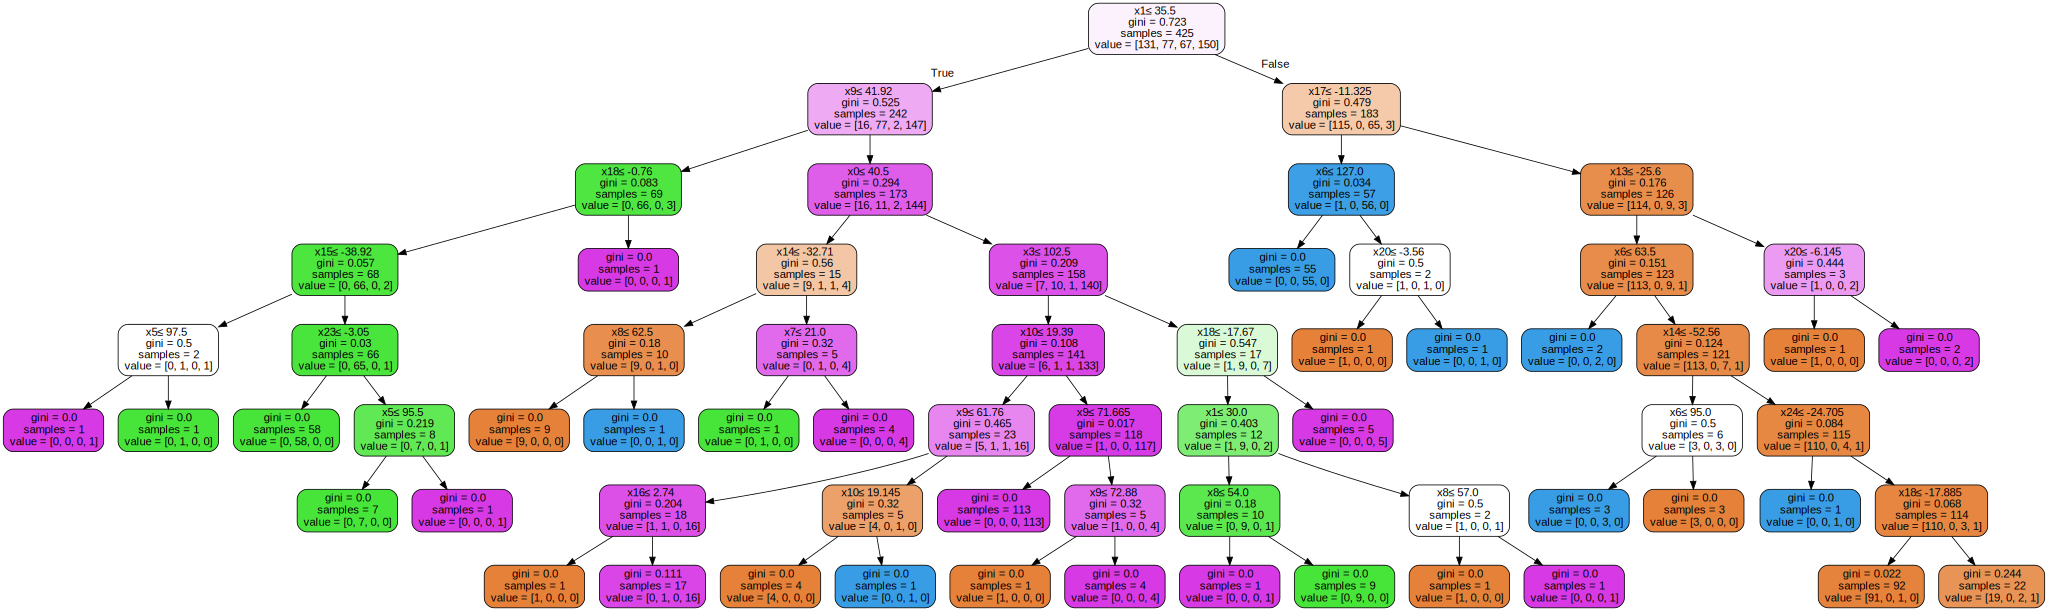

In [64]:
clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('Forest Type Mapping', view=True)
graph

In [65]:
# Get the predicted labels
yp = clf.predict(Xt)

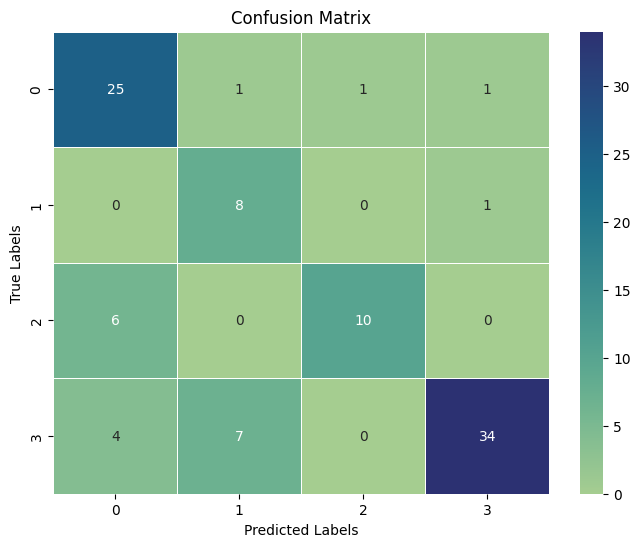

In [67]:

# Create a confusion matrix
cm = confusion_matrix(yt, yp)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="crest", linewidth='0.5')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

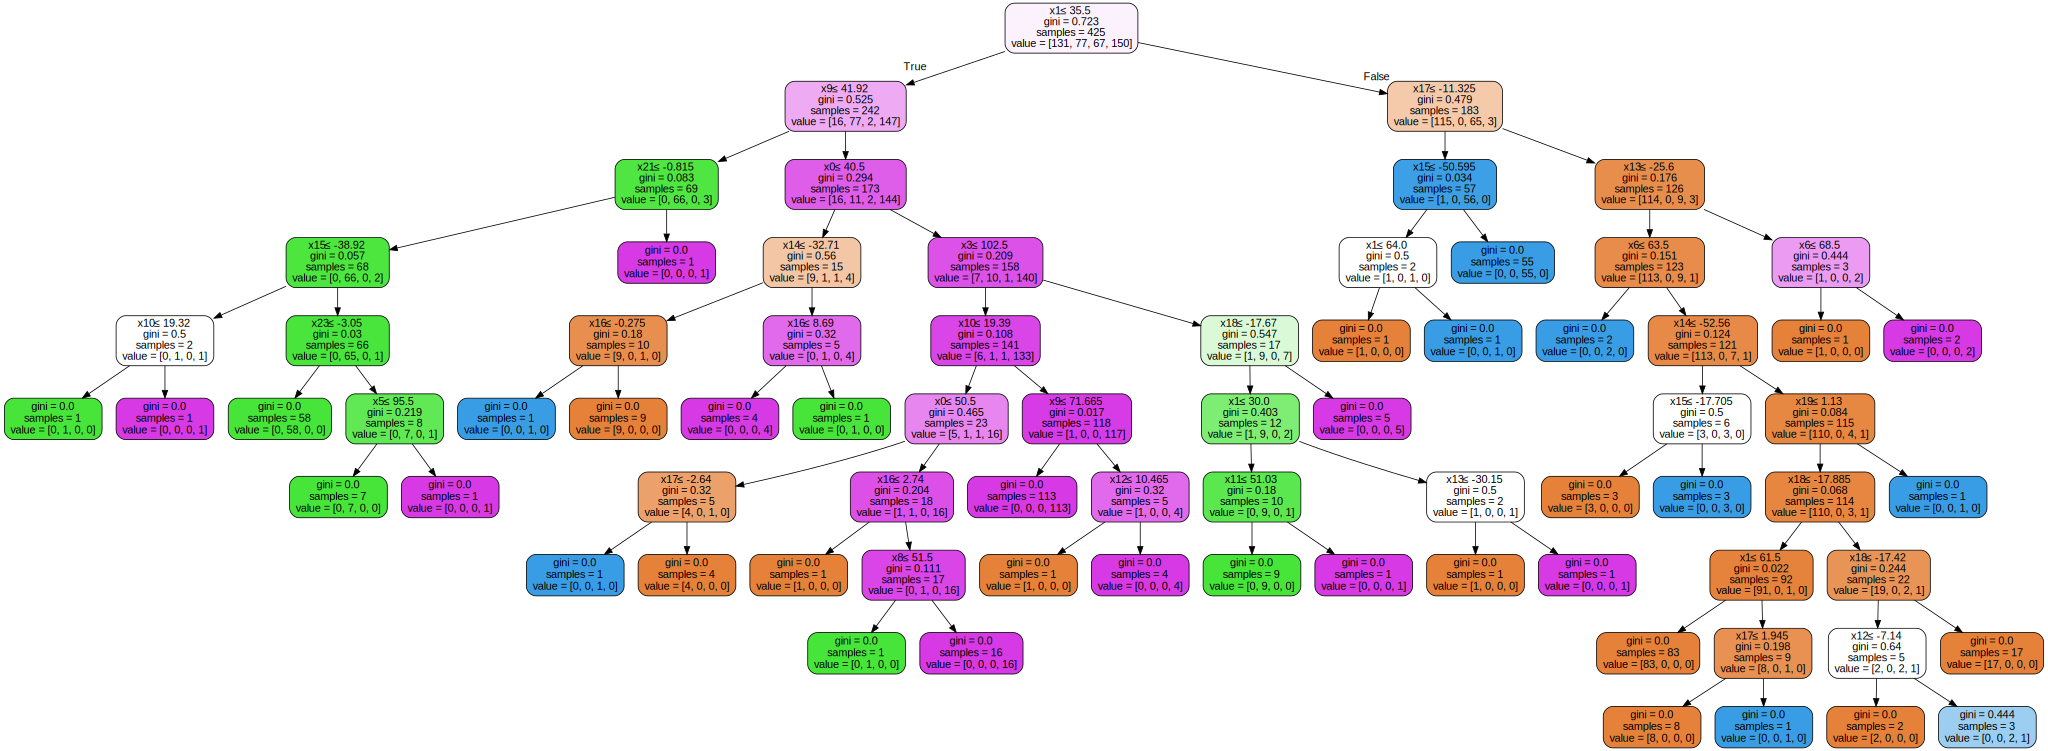

In [77]:
clf = tree.DecisionTreeClassifier(max_depth=9)
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('Forest Type Mapping', view=True)
graph

In [78]:
# Get the predicted labels
yp = clf.predict(Xt)

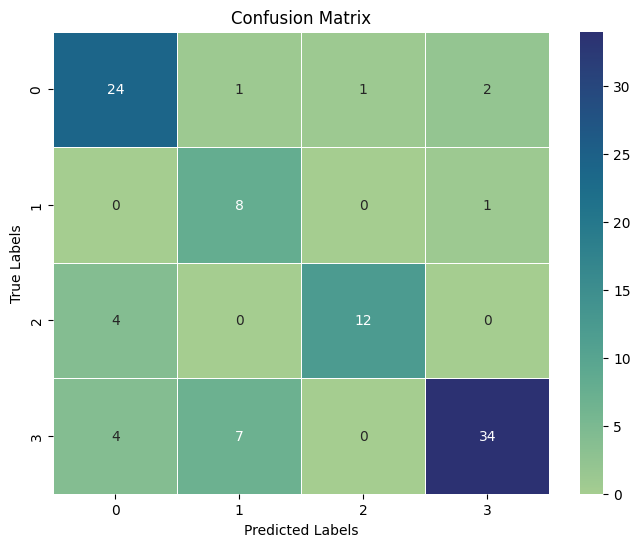

In [79]:

# Create a confusion matrix
cm = confusion_matrix(yt, yp)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="crest", linewidth='0.5')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
predictions = clf.predict(Xt)
predictions

array(['d ', 'h ', 's ', 's ', 'd ', 'h ', 's ', 'd ', 's ', 'o ', 's ',
       'o ', 'o ', 'd ', 's ', 'o ', 'o ', 'd ', 's ', 'h ', 'o ', 'd ',
       's ', 'h ', 'd ', 'h ', 'o ', 'd ', 'd ', 'd ', 'd ', 's ', 'o ',
       's ', 'd ', 'd ', 'd ', 'h ', 'o ', 'd ', 'd ', 'd ', 's ', 's ',
       'h ', 'd ', 'd ', 'o ', 'd ', 's ', 'd ', 's ', 's ', 'h ', 'h ',
       's ', 'o ', 'd ', 'h ', 'h ', 'd ', 'o ', 'o ', 'o ', 'h ', 's ',
       'h ', 'd ', 'd ', 'h ', 'o ', 'o ', 'o ', 's ', 'h ', 's ', 'd ',
       'o ', 's ', 's ', 'd ', 'd ', 'o ', 'h ', 'o ', 'h ', 'd ', 'd ',
       's ', 'o ', 'o ', 'h ', 'o ', 'o ', 'd ', 's ', 'o ', 'h ', 'o ',
       's ', 'd ', 'o ', 'h ', 'h ', 'h ', 'h ', 'h ', 'd ', 's ', 'h ',
       'd ', 'd ', 'd ', 'd ', 'h ', 'o ', 's ', 'h ', 's ', 's ', 's ',
       's ', 'o ', 's ', 'h ', 's ', 'h ', 's ', 'h ', 'd ', 's ', 's ',
       'o ', 's ', 'h ', 's ', 'o ', 's ', 'd ', 's ', 's ', 'h ', 's ',
       'h ', 's ', 'd ', 'd ', 's ', 'h ', 'd ', 's

In [ ]:
# show difference between tree that doesn't have stopping criteria and the one that does
clf.predict_proba(Xt)

array([[1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.01694915, 0.        , 0.        , 0.98305085],
       [0.01694915, 0.        , 0.        , 0.98305085],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.01694915, 0.        , 0.        , 0.98305085],
       [1.        , 0.        , 0.        , 0.        ],
       [0.01694915, 0.        , 0.        , 0.98305085],
       [0.        , 0.        , 1.        , 0.        ],
       [0.01694915, 0.        , 0.        , 0.98305085],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.01694915, 0.        , 0.        , 0.98305085],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [1.        , 0.        ,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(yt, predictions)

0.9949494949494949

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yt, predictions, labels=[0,1])

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
from sklearn.metrics import precision_score
precision_score(yt, predictions)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.metrics import recall_score
recall_score(yt, predictions)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yt, predictions, target_names=['malignant', 'benign']))

ValueError: Number of classes, 4, does not match size of target_names, 2. Try specifying the labels parameter

In [ ]:
feature_names = X.columns
feature_names

Index(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9',
       'pred_minus_obs_H_b1', 'pred_minus_obs_H_b2', 'pred_minus_obs_H_b3',
       'pred_minus_obs_H_b4', 'pred_minus_obs_H_b5', 'pred_minus_obs_H_b6',
       'pred_minus_obs_H_b7', 'pred_minus_obs_H_b8', 'pred_minus_obs_H_b9',
       'pred_minus_obs_S_b1', 'pred_minus_obs_S_b2', 'pred_minus_obs_S_b3',
       'pred_minus_obs_S_b4', 'pred_minus_obs_S_b5', 'pred_minus_obs_S_b6',
       'pred_minus_obs_S_b7', 'pred_minus_obs_S_b8', 'pred_minus_obs_S_b9'],
      dtype='object')

In [ ]:
clf.feature_importances_

array([0.        , 0.33847153, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.32166617,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02620549, 0.        , 0.28675956, 0.        , 0.        ,
       0.01341391, 0.01348333, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [ ]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
b2,0.338472
pred_minus_obs_H_b1,0.321666
pred_minus_obs_H_b9,0.286760
pred_minus_obs_H_b7,0.026205
pred_minus_obs_S_b4,0.013483
pred_minus_obs_S_b3,0.013414
b1,0.000000
pred_minus_obs_S_b8,0.000000
pred_minus_obs_S_b7,0.000000
pred_minus_obs_S_b6,0.000000


In [ ]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['b2',
 'pred_minus_obs_H_b1',
 'pred_minus_obs_H_b9',
 'pred_minus_obs_H_b7',
 'pred_minus_obs_S_b4',
 'pred_minus_obs_S_b3']

<Axes: >

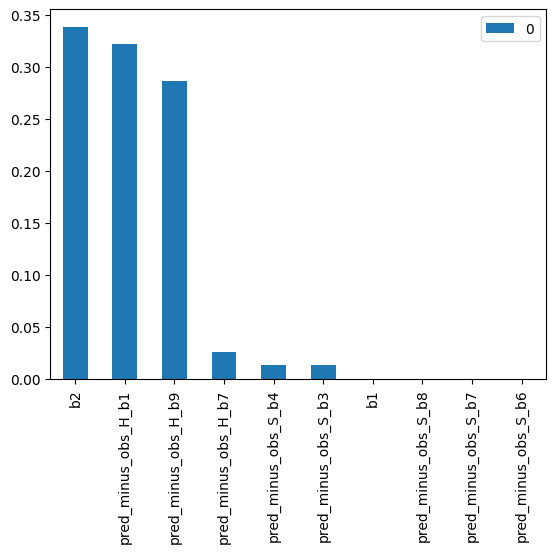

In [ ]:
feature_importance.head(10).plot(kind='bar')

KeyError: 3

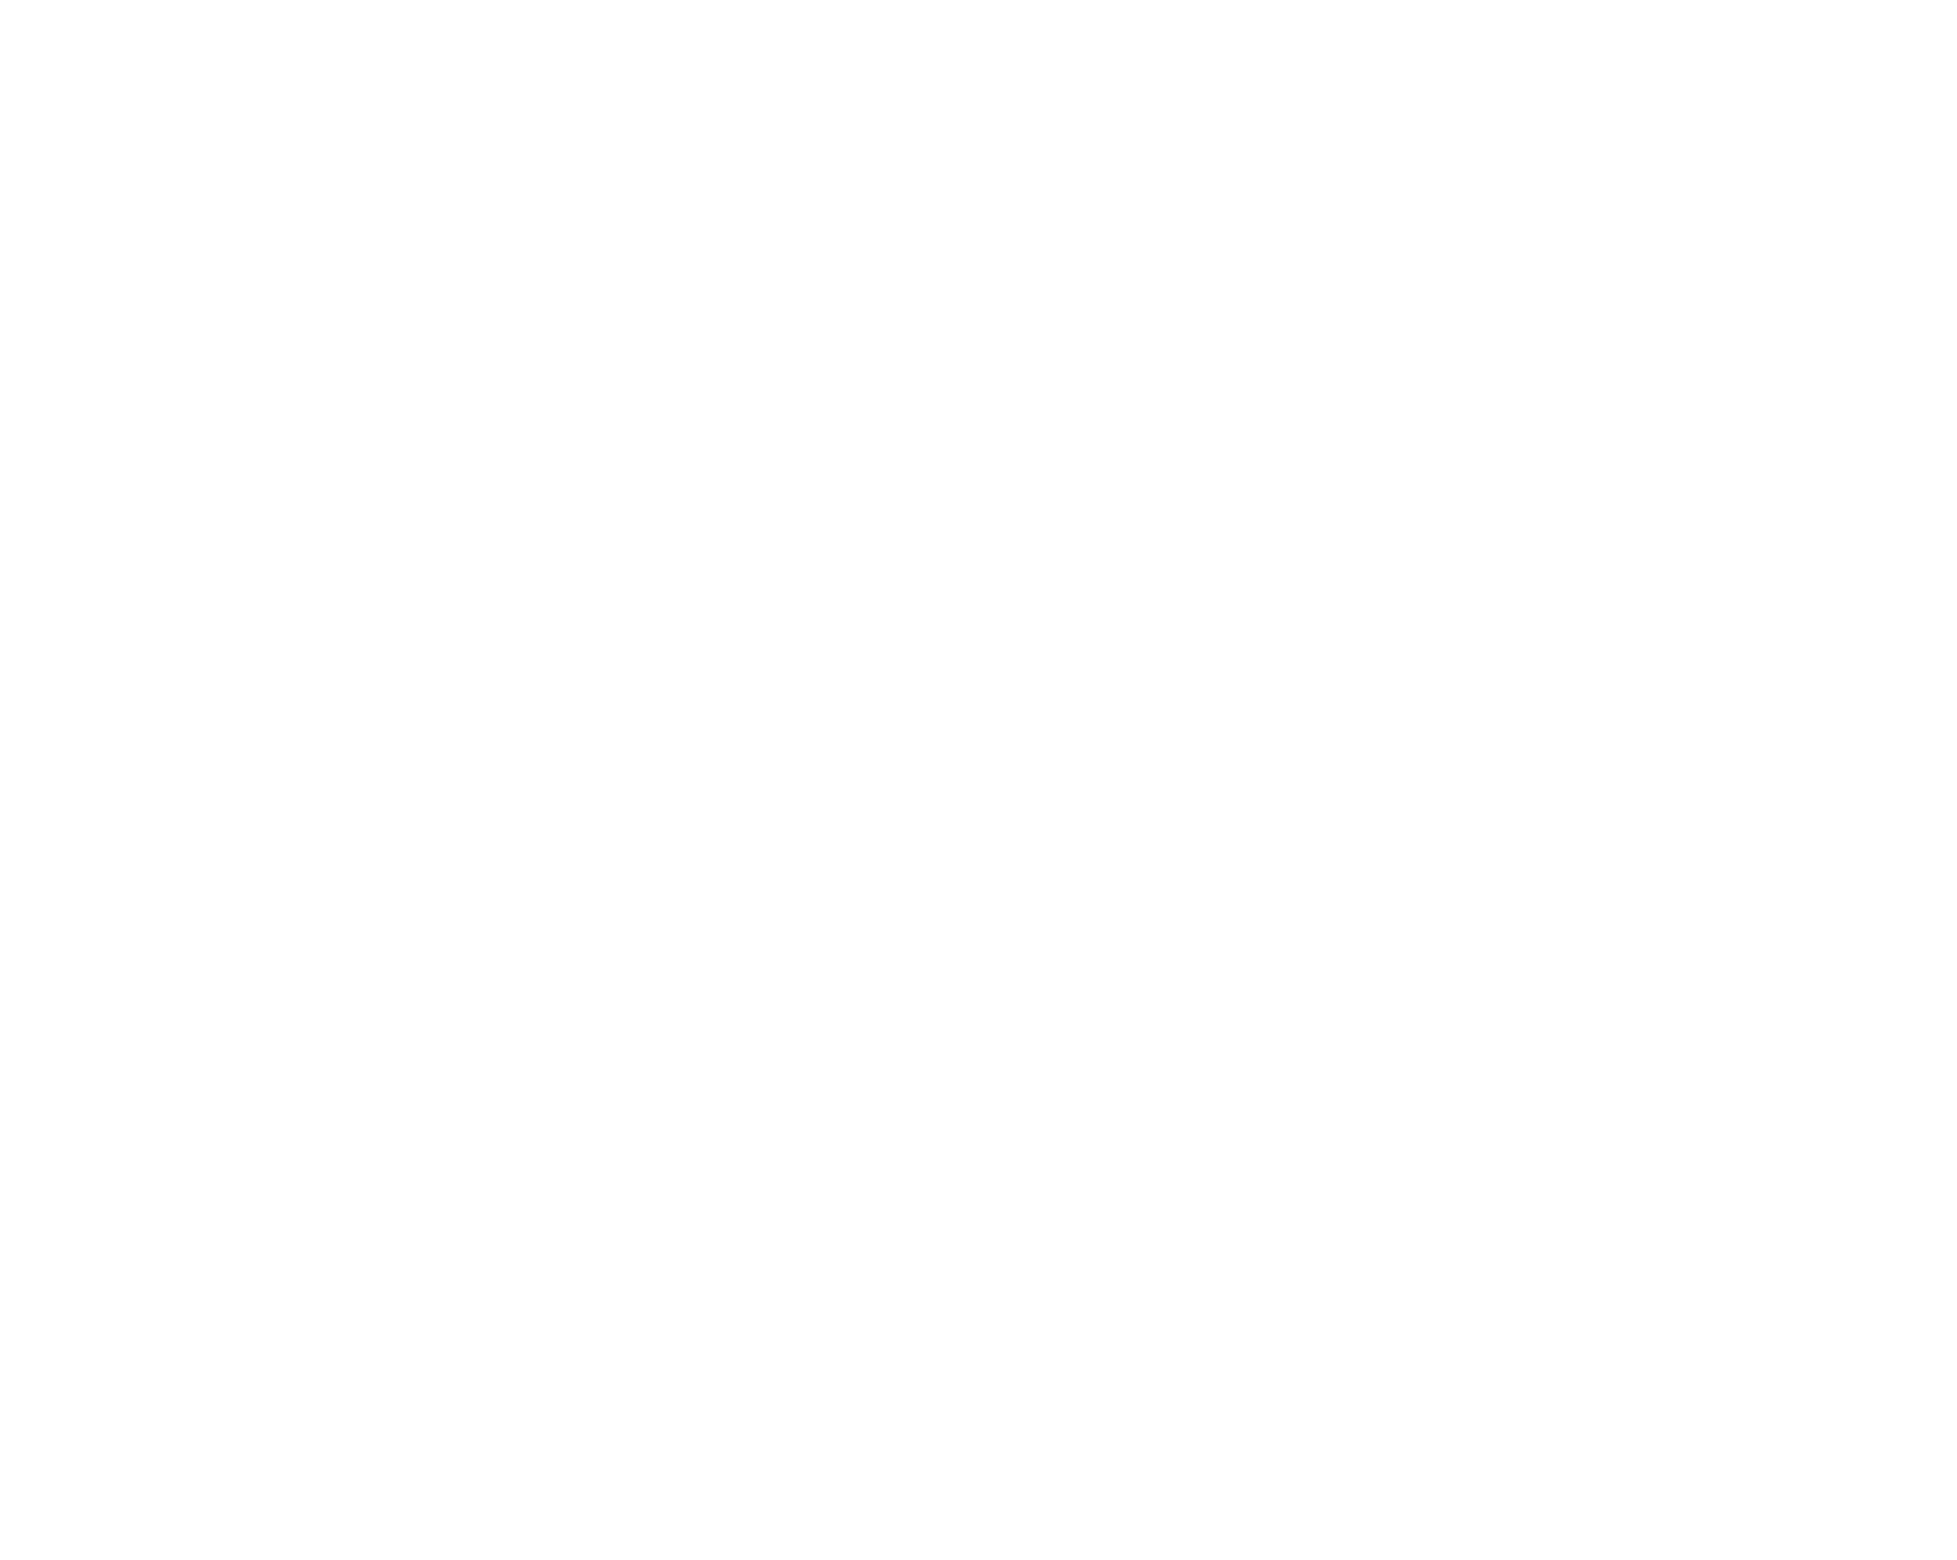

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=12)

In [ ]:
# follow the first example on the tree to explain the decision_path function output
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
218,19.800,21.56,129.70,1230.0,0.09383,0.13060,0.127200,0.086910,0.2094,0.05581,...,25.73,28.64,170.30,2009.0,0.13530,0.32350,0.36170,0.18200,0.3070,0.08255
407,12.850,21.37,82.63,514.5,0.07551,0.08316,0.061260,0.018670,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
97,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,...,10.92,26.29,68.81,366.1,0.13160,0.09473,0.02049,0.02381,0.1934,0.08988
134,18.450,21.91,120.20,1075.0,0.09430,0.09709,0.115300,0.068470,0.1692,0.05727,...,22.52,31.39,145.60,1590.0,0.14650,0.22750,0.39650,0.13790,0.3109,0.07610
295,13.770,13.27,88.06,582.7,0.09198,0.06221,0.010630,0.019170,0.1592,0.05912,...,14.67,16.93,94.17,661.1,0.11700,0.10720,0.03732,0.05802,0.2823,0.06794


In [ ]:
clf.decision_path(X_test)

<188x11 sparse matrix of type '<class 'numpy.int64'>'
	with 582 stored elements in Compressed Sparse Row format>

In [ ]:
sparse = clf.decision_path(X_test).toarray()[:101]

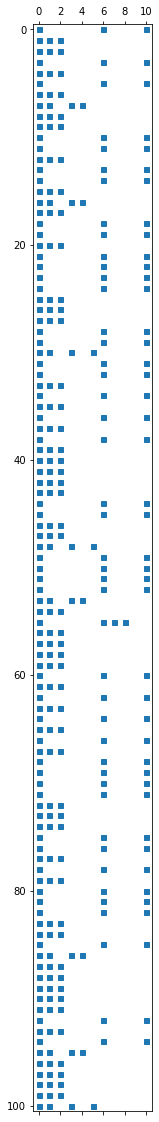

In [ ]:
plt.figure(figsize=(20, 20))
plt.spy(sparse, markersize=5)